# Lesson 7: Algorithm Optimization

In the past lesson we have created a dataset out from students knowledge of Python, Pandas and Numpy. But that's not the only way to represente datasets.

Let's dive into other representations of data, like text, images and audio.

In [2]:
# Step 0. Import libraries and custom functions
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
import matplotlib.pyplot as plt
import wave

In [12]:
# 1. Text representation
# 1.1 Let's create a dataset
df_samp = pd.DataFrame({'mag':[4,3,2,1], 'val':[3.14,2.71,1,0], #entero y flotante
                        'cat':['real','real','nat','nat'], #categorico
                        'text':['this is pi','this is euler','one','zero']}) #texto
df_samp

,mag,val,cat,text
0,4,3.14,real,this is pi
1,3,2.71,real,this is euler
2,2,1.00,nat,one
3,1,0.00,nat,zero


In [3]:
# Now, computer can only read numbers so how can we convert this dataset to a
# numeric representation?
# 1.2 Categoricals: You can represent them with a yes, it is or  no, it's not



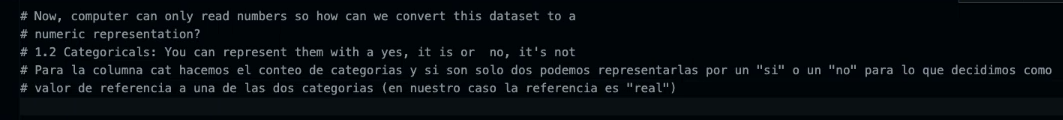

In [13]:
df_samp["cat_is_real"] = df_samp["cat"].apply(lambda x: 1 if x == "real" else 0) #convertir variable categorica a numerica
df_samp

,mag,val,cat,text,cat_is_real
0,4,3.14,real,this is pi,1
1,3,2.71,real,this is euler,1
2,2,1.00,nat,one,0
3,1,0.00,nat,zero,0


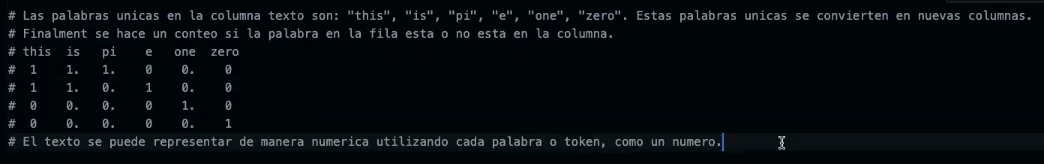

In [6]:
# 1.3 Text: You can create a representation of text, encoding position
# this  is   pi    euler   one  zero
#   1    1    1    0    0    0
#   1    1    0    1    0    0
#   0    0    0    0    1    0
#   0    0    0    0    0    1
# But this could be hard for long text, so let's use the sklearn library
# To vectorize our text


In [14]:
vectorizer =CountVectorizer()
general = vectorizer.fit_transform(df_samp["text"])
general

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (4, 6)>

In [17]:
# Then we convert the vectorized text into a matrix
text_matrix = general.toarray()
text_matrix

array([[0, 1, 0, 1, 1, 0],
       [1, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1]])

In [18]:
# And we get the word associated with each column
names = vectorizer.get_feature_names_out()
names

array(['euler', 'is', 'one', 'pi', 'this', 'zero'], dtype=object)

In [20]:
# Then we create our dataframe
df_text = pd.DataFrame(data = text_matrix,columns= names)
df_text

,euler,is,one,pi,this,zero
0,0,1,0,1,1,0
1,1,1,0,0,1,0
2,0,0,1,0,0,0
3,0,0,0,0,0,1


In [22]:
# And we append it to our original dataframe
df_final = pd.concat([df_samp, df_text], axis=1)
df_final = df_final.drop(["cat","text"], axis=1)
df_final

,mag,val,cat_is_real,euler,is,one,pi,this,zero
0,4,3.14,1,0,1,0,1,1,0
1,3,2.71,1,1,1,0,0,1,0
2,2,1.00,0,0,0,1,0,0,0
3,1,0.00,0,0,0,0,0,0,1


JPEG (192, 192)


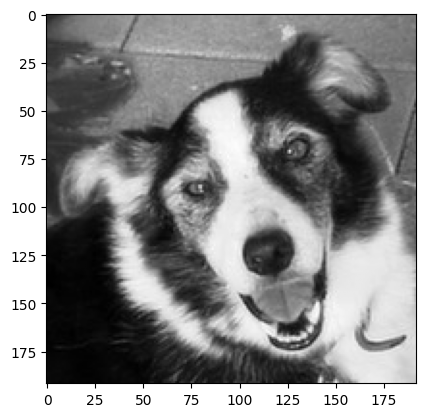

In [35]:
# 1.4 Images
# Now, images are also a representation of what we perceive with our eyes
# So if you have a capturing device like a camera, you'll get that perception
# into an electronic image, which is a 2D representation
# Let's open an image and get a view

my_image = Image.open("../docs/husky.jpeg")
print(my_image.format, my_image.size)
plt.imshow(my_image,cmap="gray")
plt.show()

In [36]:
# And we'll see that an image is just a matrix
my_image_array = np.asarray(my_image)
my_image_array

#cada valor ene l array de abajo es un pixel

array([[ 68,  64,  61, ..., 127, 124, 131],
       [ 60,  56,  54, ..., 126, 124, 126],
       [ 58,  54,  53, ..., 123, 122, 125],
       ...,
       [ 21,  21,  21, ..., 202, 202, 201],
       [ 21,  21,  21, ..., 203, 202, 200],
       [ 21,  22,  22, ..., 202, 200, 197]], shape=(192, 192), dtype=uint8)

In [38]:
# 1.5 Audio
# Now audio is a representation of what we perceive with our ears
# With the right audio capturing device, we can transform the audio
# into a digital representation
with wave.open("../docs/bark.wav") as f:
  buffer = f.readframes(f.getnframes())
  interleaved = np.frombuffer(buffer, dtype=f'int{f.getsampwidth()*8}')
  my_audio = np.reshape(interleaved, (-1, f.getnchannels()))

In [39]:
# Which is als
my_audio

array([[-44, -37],
       [-45, -39],
       [-46, -43],
       ...,
       [  0,   1],
       [  0,   2],
       [  0,   0]], shape=(71571, 2), dtype=int16)

In [14]:
# Credits
# Bark audio: https://mixkit.co/free-sound-effects/
# Dog image: https://stackoverflow.com/questions/7941743/saving-gray-images-in-jpeg-using-matlab-imwrite
# Audio convertion: https://stackoverflow.com/questions/54174160/how-to-get-numpy-arrays-output-of-wav-file-format#54174291

In [40]:
#Primer algoritmo. Calcular el promedio de una lista.


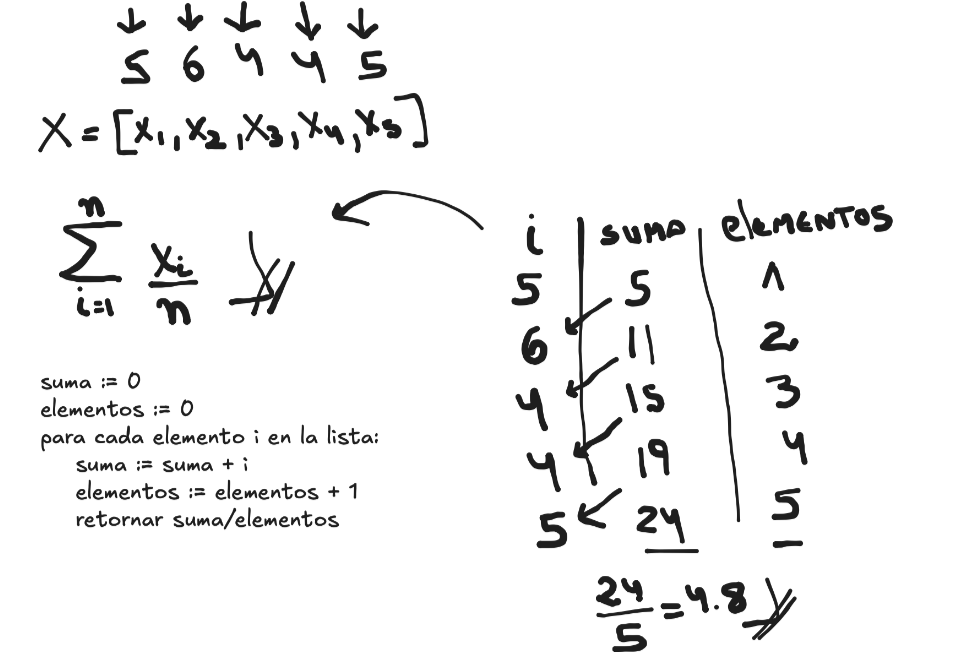

In [41]:
my_list = [5,6,4,4,5]
suma = 0
elementos = 0
for i in my_list: #Para un ciclo for no es 1 sino "n" depedera de los elementos que tengamos en la lista.
    suma = suma + i #Se hace n veces
    elementos = elementos + i #Se hace n veces
print (suma/elementos) #1


1.0


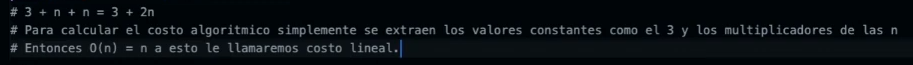

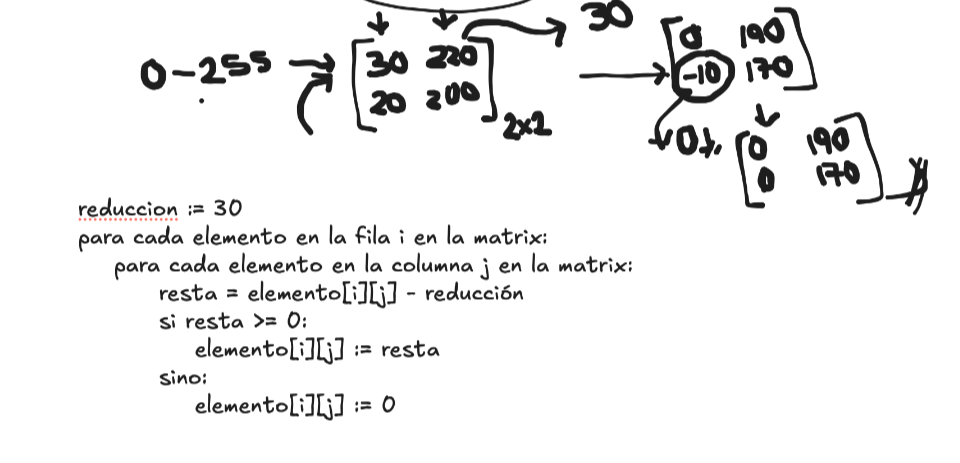

In [43]:
my_matrix = [[30,150,220],[35,140,250],[20,160,230]]
my_matrix

[[30, 150, 220], [35, 140, 250], [20, 160, 230]]

In [44]:
len(my_matrix) #filas

3

In [46]:
len(my_matrix[0]) #columnas

3

In [57]:
reduccion = 30
for i in range(len(my_matrix)):
    for j in range(len(my_matrix)):
        #print(my_matrix[i][j])
       resta = my_matrix[i][j] - reduccion
       if resta >= 0:
           my_matrix[i][j] = resta
       else:
           my_matrix[i][j] = 0
my_matrix

[[0, 90, 160], [0, 80, 190], [0, 100, 170]]